# E-Commerce Supply Chain Analysis

In [74]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
from IPython.display import Image, display

In [75]:
df = pd.read_csv("supply_chain_data.csv")

In [76]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [77]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

## Price of Product and Revenue Generated by them 

In [78]:
fig = px.scatter(df, x = 'Price',
                 y = 'Revenue generated',
                 color = 'Product type',
                 hover_data= ['Number of products sold'],
                 trendline = 'ols')

fig.show()

## Sales by Product type

In [79]:
df['Sales'] = df['Price'] * df['Number of products sold']

In [80]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Sales
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,55986.020445
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,10924.833130
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,90.557466
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,5076.557470
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,4185.587048


In [81]:
Product_type_Sale = df.groupby("Product type")['Sales'].sum().reset_index()
Product_type_Sale['Sales'] = Product_type_Sale['Sales'].round(2)
Product_type_Sale

,Product type,Sales
0,cosmetics,600580.45
1,haircare,632896.21
2,skincare,1052073.30


In [82]:
df['Sales'] = df['Sales'].round(2)

pie_chart = px.pie(df, values = 'Sales', names = 'Product type',
                   title = 'Sales by Product Type',
                   hover_data = ['Sales'],
                    hole = 0.5,
                    color_discrete_sequence = px.colors.qualitative.Pastel,
                  height = 500, 
                  width = 500)
pie_chart.update_traces(textposition = 'inside', textinfo = 'percent+label')
pie_chart.show()

## Total Revenue Generated fom Shipping Carries

In [83]:
df['Revenue generated'] = df['Revenue generated'].round(2)

Total_Revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
Total_Revenue


,Shipping carriers,Revenue generated
0,Carrier A,142630.04
1,Carrier B,250094.64
2,Carrier C,184880.18


In [84]:
fig = go.Figure()

fig.add_trace(go.Bar(x = Total_Revenue['Shipping carriers'],
                     y = Total_Revenue['Revenue generated'],
                     marker_color=['red', 'blue', 'green', 'orange', 'purple'],
                    text = Total_Revenue['Revenue generated']))

fig.update_layout(title = 'Total Revenue Generated fom Shipping Carries',
                 xaxis_title = 'Shipping carriers',
                 yaxis_title = 'Revenue generated',
                 height = 500,
                 )

fig.show()

## Revenue Generated by each SKU

In [85]:
SKU_Revenue = df.groupby('SKU')['Revenue generated'].sum().reset_index()
SKU_Revenue

,SKU,Revenue generated
0,SKU0,8662.00
1,SKU1,7460.90
2,SKU10,2330.97
3,SKU11,6099.94
4,SKU12,2873.74
...,...,...
95,SKU95,7386.36
96,SKU96,7698.42
97,SKU97,4370.92
98,SKU98,8525.95


In [86]:
revenue_chart = px.line(SKU_Revenue, x = 'SKU',
                        y = 'Revenue generated',
                        title = 'Revenue Generated by SKU')

revenue_chart.show()

In [87]:
revenue_chart = px.bar(
    SKU_Revenue,
    x='Revenue generated',
    y='SKU',
    orientation='h',
    title='Revenue Generated by SKU', height = 1000
)

revenue_chart.show()

## Shipping Cost of Carriers

In [88]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'Sales'],
      dtype='object')

In [89]:
Shipping_cost_carriers = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()
Shipping_cost_carriers

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


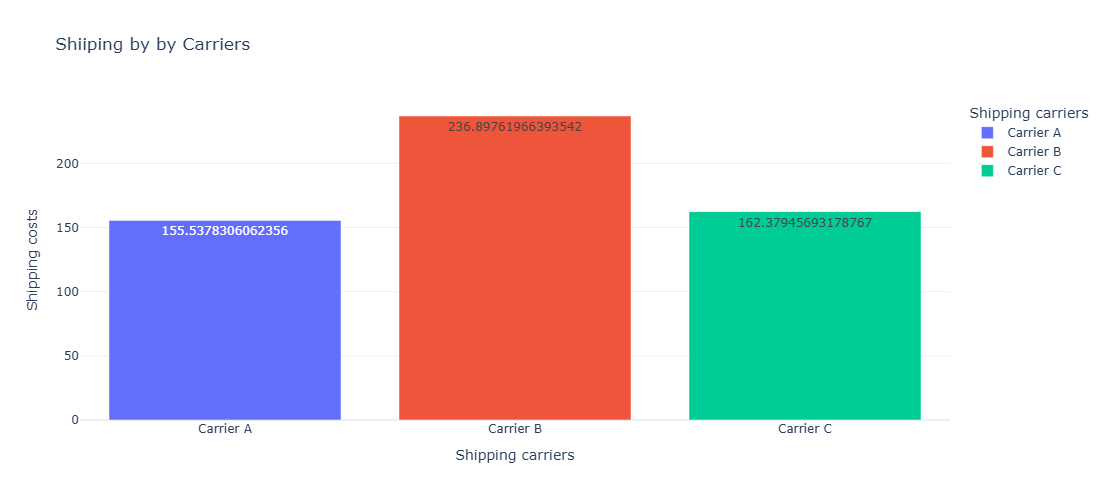

In [90]:
shiiping_cos_carrier_bar = px.bar(Shipping_cost_carriers, x = 'Shipping carriers',
                                  y = 'Shipping costs', 
                                  title = 'Shiiping by by Carriers', 
                                  height = 500, 
                                  color = 'Shipping carriers', 
                                  text = Shipping_cost_carriers['Shipping costs'])
shiiping_cos_carrier_bar.show()

## Cost Distribution by Transportation Mode

In [91]:
Transportation_Mode_cost_Dist = df.groupby('Transportation modes')['Costs'].sum().reset_index()
Transportation_Mode_cost_Dist

,Transportation modes,Costs
0,Air,14604.527498
1,Rail,15168.931559
2,Road,16048.193639
3,Sea,7102.925520


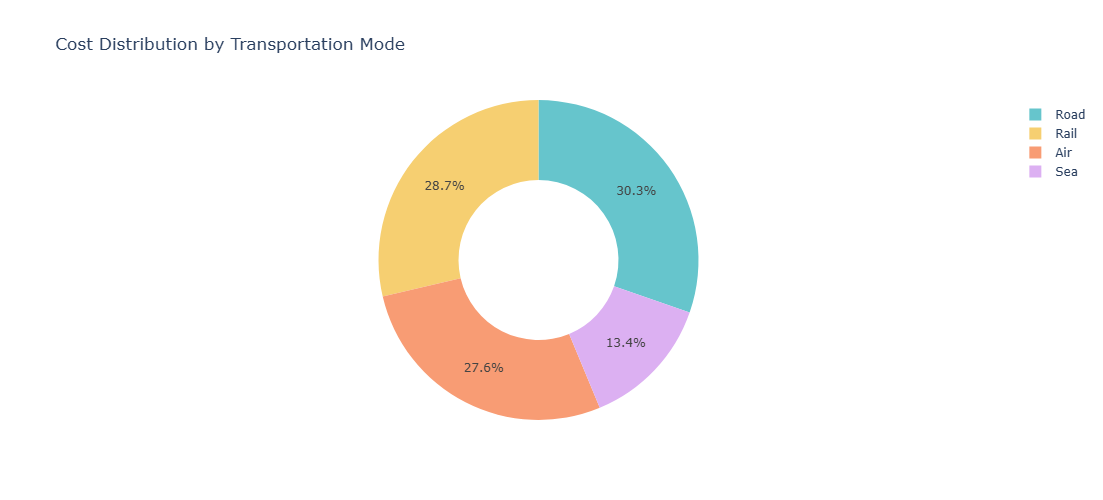

In [92]:
Transportation_chart = px.pie(Transportation_Mode_cost_Dist, 
                              names = 'Transportation modes',
                              values = 'Costs',
                              title = 'Cost Distribution by Transportation Mode',
                              hole = 0.5, 
                              width = 500,
                              height = 500,
                              color_discrete_sequence = px.colors.qualitative.Pastel)


Transportation_chart.show()

## Defectc Rate of Product during Shippng

In [93]:
defect_rate_Product = df.groupby('Product type')['Defect rates'].mean().reset_index()
defect_rate_Product

,Product type,Defect rates
0,cosmetics,1.919287
1,haircare,2.483150
2,skincare,2.334681


In [94]:
defect_rate_by_product = px.bar(defect_rate_Product,
                                x = 'Product type',
                                y = 'Defect rates',
                                title = 'Defect rate by Product',
                                height = 500, 
                                text = defect_rate_Product['Defect rates'],
                                color = 'Product type')

defect_rate_by_product.show()